In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [41]:
# define parameters 

ticker = 'SNOW'
startDate = '2022-12-09'
endDate = '2022-12-10'
dataInterval = '5m'

fastSMA = 20 #9
normalSMA = 100 #50
slowSMA = 200 #200

# moving average period
rollingPeriod = 21

# entry ratio
entryPercentile = 0.10

# exit ratio
exitPercentile = 0.90

In [44]:
# get data
df = yf.download(ticker, startDate, endDate, interval = dataInterval)
df.reset_index(inplace=True)

df['Date'] = df['Datetime'].dt.date

[*********************100%***********************]  1 of 1 completed


In [5]:
df_sample = df[df['Date']==datetime.date(2022, 12, 9)]
df_sample.reset_index(inplace=True)

In [30]:
min_Low = []
min_Close = []
max_High = []
max_Close = []
for i in range(1,len(df_sample)):
    min_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmin()])
    max_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmax()])
    min_Low.append(df_sample['Datetime'][df_sample[:i]['Low'].idxmin()])
    max_High.append(df_sample['Datetime'][df_sample[:i]['High'].idxmax()])

In [31]:
data = {'ticker': [ticker] * len(min_Low),
        'Date': df_sample['Datetime'][1:],
        'dataInterval': [dataInterval] * len(min_Low),
        'min_Low': min_Low,
        'min_Close': min_Close,
        'max_High': max_High,
        'max_Close': max_Close
       }
data = pd.DataFrame(data)

max_High = data['max_High'].value_counts().reset_index().sort_values('max_High', ascending=False).loc[0]['index']
min_Low = data['min_Low'].value_counts().reset_index().sort_values('min_Low', ascending=False).loc[0]['index']
min_Close = data['min_Close'].value_counts().reset_index().sort_values('min_Close', ascending=False).loc[0]['index']
max_Close = data['max_Close'].value_counts().reset_index().sort_values('max_Close', ascending=False).loc[0]['index']


In [28]:
data['max_Close'].value_counts().reset_index()

,index,max_Close
0,2022-12-09 09:55:00-05:00,73
1,2022-12-09 09:40:00-05:00,1
2,2022-12-09 09:35:00-05:00,1
3,2022-12-09 09:50:00-05:00,1
4,2022-12-09 09:30:00-05:00,1
5,2022-12-09 09:45:00-05:00,1


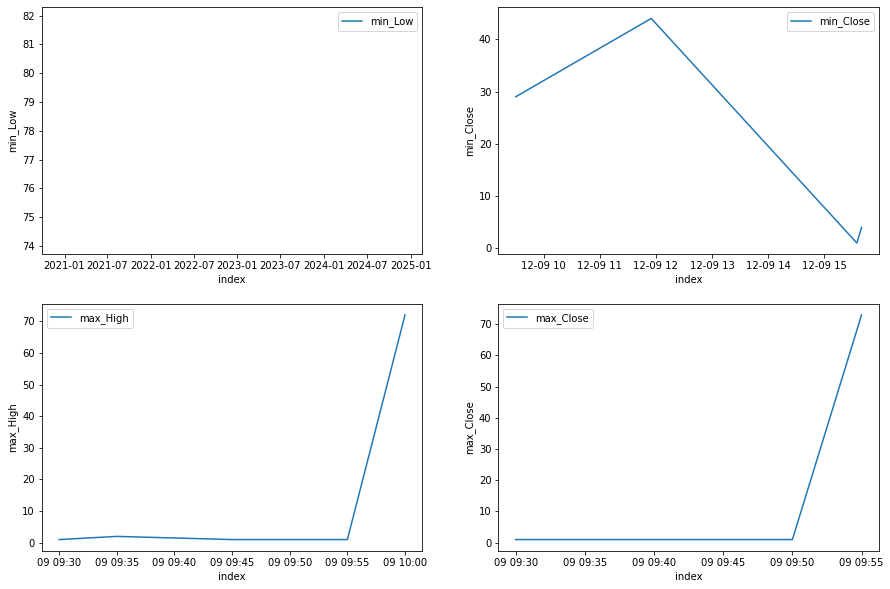

In [38]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
x = data['min_Low'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['min_Low'], label='min_Low')

plt.subplot(2,2,2)
x = data['min_Close'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['min_Close'], label='min_Close')

plt.subplot(2,2,3)
x = data['max_High'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['max_High'], label='max_High')

plt.subplot(2,2,4)
x = data['max_Close'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['max_Close'], label='max_Close')

plt.show()

In [ ]:
def getDailyStats(ticker, startDate, endDate, dataInterval):
    # get data
    df = yf.download(ticker, startDate, endDate, interval = dataInterval)
    df.reset_index(inplace=True)

    df['Date'] = df['Datetime'].dt.date
    df_sample = df.reset_index()
    
    min_Low = []
    min_Close = []
    max_High = []
    max_Close = []
    for i in range(1,len(df_sample)):
        min_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmin()])
        max_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmax()])
        min_Low.append(df_sample['Datetime'][df_sample[:i]['Low'].idxmin()])
        max_High.append(df_sample['Datetime'][df_sample[:i]['High'].idxmax()])
        
        
    data = {'ticker': [ticker] * len(min_Low),
        'Date': df_sample['Datetime'][1:],
        'dataInterval': [dataInterval] * len(min_Low),
        'min_Low': min_Low,
        'min_Close': min_Close,
        'max_High': max_High,
        'max_Close': max_Close
       }
    data = pd.DataFrame(data)

    max_High = data['max_High'].value_counts().reset_index().sort_values('max_High', ascending=False).loc[0]['index']
    min_Low = data['min_Low'].value_counts().reset_index().sort_values('min_Low', ascending=False).loc[0]['index']
    min_Close = data['min_Close'].value_counts().reset_index().sort_values('min_Close', ascending=False).loc[0]['index']
    max_Close = data['max_Close'].value_counts().reset_index().sort_values('max_Close', ascending=False).loc[0]['index']

    
    data = {'ticker': ticker,
        'Date': startDate,
        'dataInterval': dataInterval,
        'min_Low': min_Low,
        'min_Close': min_Close,
        'max_High': max_High,
        'max_Close': max_Close
       }
    return data

In [193]:

tickers = [ 'AAPL',  'MSFT',  'GOOG',  'GOOGL',  'AMZN',  'TSLA',  'UNH',  'JNJ',  'V',  'XOM',  'TSM',  'NVDA',  'WMT',  'TCTZF',  'TCEHY',  'JPM',  'LVMHF',  'LVMUY',  'PG',  'LLY',  'MA',  'HD',  'CVX',  'NSRGF',  'NSRGY',  'RHHBF',  'META',  'PFE',  'NVO',  'NONOF',  'ABBV',  'MRK',  'KO',  'BAC',  'RHHBY',  'RHHVF',  'PEP',  'BABAF',  'BABA',  'ASMLF',  'ASML',  'AVGO',  'TMO',  'AZNCF',  'AZN',  'ORCL',  'COST',  'PROSY',  
            'LRLCY',  'MCD',  'CSCO',  'LRLCF',  'RYDAF',  'NVSEF',  'TOYOF',  'DHR',  'SHEL',  'NVS',  'TM',  'ABT',  'ACN',  'IDCBY',  'TMUS',  'NKE',  'DIS',  'NEE',  'BMY', 
            'HESAF',  'HESAY',  'LIN',  'WFC',  'BHP',  'BHPLF',  'PM',  'TXN',  'VZ',  'ADBE',  'UPS',  'CMCSA',  'MS',  'CICHY',  'SCHW',  'AMGN',  'TTFNF',  'TTE',  'MPNGF',  
            'RTX',  'MPNGY',  'NFLX',  'HON',  'CHDRY', 
            'COP',  'T',  'CIHKY',  'CVS',  'QCOM',  'IBM',  'RY',  'DE',  'CRM',  
            'UNLYF',  'UNP',  'AAIGF',  'AAGIY',  'HDB',  'UL',  'RTNTF',  'LMT',  'PIAIF',  'SAP',  'ELV',  'SAPGF',  'LOW',  'GS',  'HSBC',  'PNGAY', 
            'TD',  'CMWAY',  'HBCYF',   'BUDFF',  'CAT',  'BUD',  'RIO',  'SNY',  'SBUX',  'INTC',  'ACGBY',  'RTPPF',  
            'AXP',  'PDD',  'SPGI',  'SMAWF',  'INTU',  'SIEGY',  'EQNR',  'AMD',  
            'GILD',  'PLD',  'BA',  'ADP',  'BLK',  'DEO',  'MDT',  
            'BP',  'CI',    'AMT',  'SONY',  'VWAGY',  'BTI',  'SYK',  'AMAT', 
            'JDCMF',  'JD',  'CB',  'TJX',  'GE',  'ALIZF',  'C',  'ALIZY',  'ADI',  'EL',  'GLCNF',  'MMC',  'GLNCY',  'CNI',  'PYPL',  'MO',  'ESLOY',  'ESLOF',  'MKGAF',  'MKKGY',  'REGN',  'NOC',  'SBGSF',  'SBGSY',  'PCCYF',  'IDEXF',  'VRTX',  'NOW',  'IDEXY',  'IBN',  'ENB',  'VALE',  'BYDDF',  'BYDDY',  'BKNG',  'INFY',  'DUK',  'PGR',  'AIQUF',  'AIQUY',  'CFRHF',  'SO',  'CFRUY',  'GLAXF',  'GSK',  'CP',
            'ZTS',  'EOG',  'IBDSF',  'BAM',  'IBDRY',  'MUFG',  'BDX',  'TGT',  'PBR',  'APD',  'MMM',  'WM',  'BNPQY',  'BNPQF',  'MRNA',  'GD',  
            'HUM',  'ITW',  'PPRUY',  'HCA',  'PPRUF',  'PBCRY',  'SLB',  'BSX',  'CSX',  'USB',  'SHW',  'SFTBY',  'SFTBF',  'CL',  'NABZY',  'KDDIF',  'CME',  'FISV',  'KDDIY',  'DBSDY',  'AON',  'DBSDF',  'ETN',  'FRCOY',  'BMO',  'EQIX',  'WMMVY',  'WMMVF',
            'PNC',  'DSNKY',   'CCI',  'CNQ',   'ABNB',  'BNS',  'MU', 'CHTR',    'SMMNY',  'ATVI',   'ABB',  'VCISY',  'ABLZF',  'UBS',  'AMX',  'ICE',  'BX',  'AMOV',  'OXY',  'CSUAY',  'MET',  'NSC',  'PSTVY',  'TFC',  
            'EMR',  'ATLCY',  'ESOCF',  'HKXCY',  'FCX',  'TRI',  'ENLAY',   'RELX',  'BAYRY',  'BAYZF',  'DG',  'RLXXF',  'GM', 
            'KDP',  'F',  'UBER',  'MCO',  'MCK',  'SAFRF',  'SAFRY',  'PSA',  'MNST',  'NGLOY',  'EPD',  'TOELY',  'AAUKF',  'TOELF',  'ORLY',  'RBGLY',  'VMW',  'SOBKY',  'RBGPF',  'MAR',  'GIS',  'PXD',  'SRE',  'SHECY',  'ADM',  'SHECF',  'LDNXF',  'SFBQF',  'LNSTY',  'PRNDY',  'RCRRF',  'PDRDF',  'MPC',  'RCRUY',  'SNPS',  'AEP',  'E', 
            'KHC',  'SAN',  'NTDOF',  'DPSGY',  'CNC',  'SHOP',  'HTHIY',  'D',  'HSY',  'DPSTF',  'NTDOY',  'MSBHF',  'HTHIF',  'ECIFY',  'PANW',  'ANZBY',  'DASTF',  
            'DASTY',  'OLCLY',  'TAK',   'SNOW',  'AIG',  'STLA',  'PSX',    'AZO',  'NTES',  'CTAS',  'KMB',  'ABEV',  'BASFY',  'ANCTF',  'ITOCY',  'EW',  'ROP',  'ADYEY',  'HNHPF',  'NGG',
            'JCI',  'A',  'MELI',  'CTVA',  'DXCM',  'CDNS',  'ITUB',  'FDX',  'STZ', 
            'MSI',  'VLO',  'MQBKY',  'NXPI',  
            'WDS',  'ING',  'WDAY',  'CILJF',  'TRV',  'AFL',  'CHGCY',  'ENPH',  'UNVGY',  'PAYX',  'RSG',  'ECL',  'UMGNF',  'IFNNY',  'IFNNF',  'BCE',  'CMG',  'TRP',  'ADSK',  'BAIDF',  'MCHP',  'FIS',  'SYY',  'LULU',  'BIDU', 
            'KKR',  'BNTX',   'EXC',   'BIIB',  'LHX',  'TKOMY',  'FTNT',  'OVCHY',  'TKOMF',  'HMC',  'BDWBY',  'AJG',  'O',  'TT',  'RACE',  'NTR']

startDate = '2022-12-07'
endDate = '2022-12-08'
dataInterval = '5m'

query = {'ticker': tickers,
        'startDate': [startDate] * len(tickers),
        'endDate': [endDate] * len(tickers),
         'dataInterval': [dataInterval] * len(tickers)
        }
query = pd.DataFrame(query)

In [194]:
output = []
for i in range(len(query)):
    print(query['ticker'][i], i)
    
    output.append(getDailyStats(query['ticker'][i],
                                  query['startDate'][i],
                                  query['endDate'][i],
                                  query['dataInterval'][i]))
    
    

AAPL 0
[*********************100%***********************]  1 of 1 completed
MSFT 1
[*********************100%***********************]  1 of 1 completed
GOOG 2
[*********************100%***********************]  1 of 1 completed
GOOGL 3
[*********************100%***********************]  1 of 1 completed
AMZN 4
[*********************100%***********************]  1 of 1 completed
TSLA 5
[*********************100%***********************]  1 of 1 completed
UNH 6
[*********************100%***********************]  1 of 1 completed
JNJ 7
[*********************100%***********************]  1 of 1 completed
V 8
[*********************100%***********************]  1 of 1 completed
XOM 9
[*********************100%***********************]  1 of 1 completed
TSM 10
[*********************100%***********************]  1 of 1 completed
NVDA 11
[*********************100%***********************]  1 of 1 completed
WMT 12
[*********************100%***********************]  1 of 1 completed
TCTZF 13
[******

[*********************100%***********************]  1 of 1 completed
LMT 107
[*********************100%***********************]  1 of 1 completed
PIAIF 108
[*********************100%***********************]  1 of 1 completed
SAP 109
[*********************100%***********************]  1 of 1 completed
ELV 110
[*********************100%***********************]  1 of 1 completed
SAPGF 111
[*********************100%***********************]  1 of 1 completed
LOW 112
[*********************100%***********************]  1 of 1 completed
GS 113
[*********************100%***********************]  1 of 1 completed
HSBC 114
[*********************100%***********************]  1 of 1 completed
PNGAY 115
[*********************100%***********************]  1 of 1 completed
TD 116
[*********************100%***********************]  1 of 1 completed
CMWAY 117
[*********************100%***********************]  1 of 1 completed
HBCYF 118
[*********************100%***********************]  1 of 1 complete

[*********************100%***********************]  1 of 1 completed
GD 212
[*********************100%***********************]  1 of 1 completed
HUM 213
[*********************100%***********************]  1 of 1 completed
ITW 214
[*********************100%***********************]  1 of 1 completed
PPRUY 215
[*********************100%***********************]  1 of 1 completed
HCA 216
[*********************100%***********************]  1 of 1 completed
PPRUF 217
[*********************100%***********************]  1 of 1 completed
PBCRY 218
[*********************100%***********************]  1 of 1 completed
SLB 219
[*********************100%***********************]  1 of 1 completed
BSX 220
[*********************100%***********************]  1 of 1 completed
CSX 221
[*********************100%***********************]  1 of 1 completed
USB 222
[*********************100%***********************]  1 of 1 completed
SHW 223
[*********************100%***********************]  1 of 1 completed
SF

KeyError: 'Datetime'

In [195]:
data = pd.DataFrame(output)

max_High = data['max_High'].value_counts().reset_index().sort_values('max_High', ascending=False)
# max_High['index'] = max_High['index'].dt.time.astype(str)
# max_High['index'] = pd.to_datetime(max_High['index']).dt.strftime('%H:%M:%S')


min_Low = data['min_Low'].value_counts().reset_index().sort_values('min_Low', ascending=False)

min_Close = data['min_Close'].value_counts().reset_index().sort_values('min_Close', ascending=False)

max_Close = data['max_Close'].value_counts().reset_index().sort_values('max_Close', ascending=False)


In [215]:
min_ = list(data.min().reset_index()[0])[-1]
max_ = list(data.max().reset_index()[0])[-1]

In [216]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

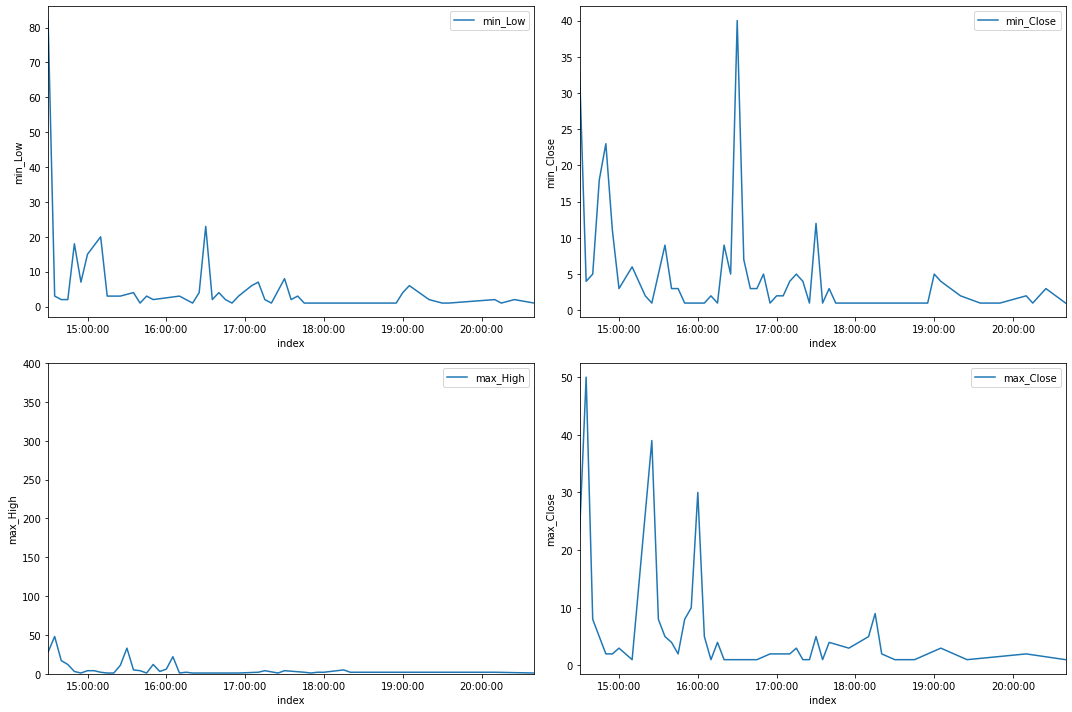

In [219]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
x = min_Low
ax =  sns.lineplot(x=x['index'],y=x['min_Low'], label='min_Low')
ax.set_xlim([min_,max_])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.subplot(2,2,2)

x = min_Close
ax = sns.lineplot(x=x['index'],y=x['min_Close'], label='min_Close')
ax.set_xlim([min_,max_])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.subplot(2,2,3)
x = max_High
ax =  sns.lineplot(x=x['index'],y=x['max_High'], label='max_High')
ax.set_xlim([min_,max_])
ax.set_ylim([0,400])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.subplot(2,2,4)
x = max_Close
ax =  sns.lineplot(x=x['index'],y=x['max_Close'], label='max_Close')
ax.set_xlim([min_,max_])
ax.set_ylim([0,400])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.tight_layout()
plt.show()

In [199]:
min_Close.head()

,index,min_Close
0,2022-12-07 11:30:00-05:00,40
1,2022-12-07 09:30:00-05:00,33
2,2022-12-07 09:50:00-05:00,23
3,2022-12-07 09:45:00-05:00,18
4,2022-12-07 12:30:00-05:00,12


In [77]:
max_Close.head()

,index,max_Close
0,2022-12-09 09:40:00-05:00,17
1,2022-12-09 11:50:00-05:00,8
2,2022-12-09 10:00:00-05:00,6
3,2022-12-09 10:55:00-05:00,5
4,2022-12-09 09:30:00-05:00,4
